In [1]:
%reload_ext autoreload
%autoreload 2

# import


In [2]:
# added 9/12, short long cross validation --------------------
# load theta infered for short trials
from stable_baselines3 import TD3
from pathlib import Path
from plot_ult import *
from scipy import stats 

In [3]:
import configparser
config = configparser.ConfigParser()
config.read_file(open('privateconfig'))
datafolder=config['Datafolder']['data']
datapath=Path(datafolder)

numhsub,numasub=25,14
logs={'a':datapath/'human/fixragroup','h':datapath/'human/clusterpaperhgroup'}


# all subject

In [4]:

# full inverse
foldername='persub1cont'
invres={'a':[],'h':[]}
for isub in range(numhsub):
    dataname="hsub{}".format(str(isub))
    savename=Path(datapath/"human/{}".format(foldername))/"invhsub{}".format(str(isub))
    if savename.is_file():
        invres['h'].append(process_inv(savename,ind=31, usingbest=True))
for isub in range(numasub):
    dataname="asub{}".format(str(isub))
    savename=Path(datapath/"human/{}".format(foldername))/"invasub{}".format(str(isub))
    if savename.is_file():
        invres['a'].append(process_inv(savename,ind=31, usingbest=True))

# short inverse
foldername='persubshort3of4'
invres['ashort']=[]
invres['hshort']=[]
for isub in range(numhsub):
    dataname="hsub{}".format(str(isub))
    savename=Path(datapath/"human/{}".format(foldername))/"invhsub{}".format(str(isub))
    if savename.is_file():
        invres['hshort'].append(process_inv(savename,ind=31, usingbest=True))
for isub in range(numasub):
    dataname="asub{}".format(str(isub))
    savename=Path(datapath/"human/{}".format(foldername))/"invasub{}".format(str(isub))
    if savename.is_file():
        invres['ashort'].append(process_inv(savename,ind=31, usingbest=True))

fullinvh=[log[0] for log in invres['h']]
shortinvh=[log[0] for log in invres['hshort']]

/Users/yc/Documents/lab_data/human/persub1cont/invhsub0
using ind:  30 final logll :  11.39306388582502
/Users/yc/Documents/lab_data/human/persub1cont/invhsub1
using ind:  29 final logll :  9.524847643715995
/Users/yc/Documents/lab_data/human/persub1cont/invhsub2
using ind:  30 final logll :  4.960335867745536
/Users/yc/Documents/lab_data/human/persub1cont/invhsub3
using ind:  30 final logll :  10.411478519439697
/Users/yc/Documents/lab_data/human/persub1cont/invhsub4
using ind:  29 final logll :  8.584339346204485
/Users/yc/Documents/lab_data/human/persub1cont/invhsub5
using ind:  30 final logll :  5.91722171647208
/Users/yc/Documents/lab_data/human/persub1cont/invhsub6
using ind:  30 final logll :  8.845996992928642
/Users/yc/Documents/lab_data/human/persub1cont/invhsub7
using ind:  30 final logll :  8.369195052555629
/Users/yc/Documents/lab_data/human/persub1cont/invhsub8
using ind:  28 final logll :  7.697988033294678
/Users/yc/Documents/lab_data/human/persub1cont/invhsub9
using in

Text(0, 0.5, 'linear gain')

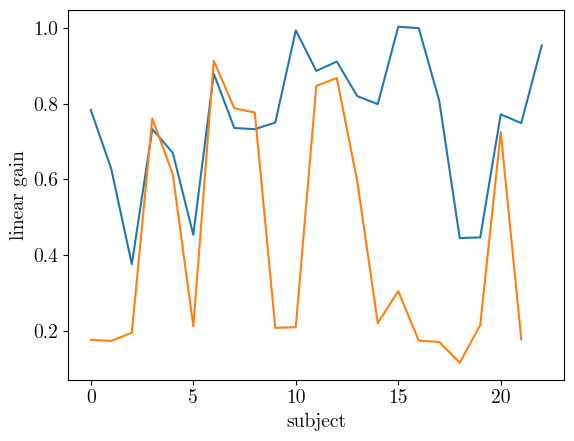

In [5]:
plt.plot([theta[0,0] for theta in fullinvh], label='full')
plt.plot([theta[0,0] for theta in shortinvh], label='partial')
plt.xlabel('subject')
plt.ylabel('linear gain')

# asd and healthy 2 group

In [7]:

# overhead of example trial -----------------------------------------------------------\
env=ffacc_real.FireFlyPaper(arg)
env.debug=True
env.terminal_vel=0.1
agent_=TD3.load('trained_agent/paper.zip')
agent=agent_.actor.mu.cpu()
phi[0]=1

# load data 
asd_data_set={}
numhsub,numasub=25,14
fulltrainfolder='persub1cont'
parttrainfolder='persub3of5dp'
for invtag in ['h','a']:
    for isub in range(numhsub):
        thesub="{}sub{}".format(invtag,str(isub))
        evalname=Path(datapath/"human/{}/evaltrain_inv{}sub{}".format(parttrainfolder,invtag,str(isub)))
        fullinverseres=Path(datapath/"human/{}".format(fulltrainfolder))/"inv{}sub{}".format(invtag,str(isub))
        partinverseres=Path(datapath/"human/{}".format(parttrainfolder))/"inv{}sub{}".format(invtag,str(isub))
        # load inv res
        if partinverseres.is_file():
            asd_data_set['partres'+thesub]=process_inv(partinverseres, usingbest=True, removegr=False)
        if fullinverseres.is_file():
            asd_data_set['res'+thesub]=process_inv(fullinverseres, usingbest=True, removegr=False)
        
        # load data
        if Path(datapath/'human/{}'.format(thesub)).is_file():
            with open(datapath/'human/{}'.format(thesub), 'rb') as f:
                states, actions, tasks = pickle.load(f)
            print(len(states))
            asd_data_set['data'+thesub]=states, actions, tasks
        
        # load test logll
        if evalname.is_file():
            with open(evalname, 'rb') as f:
                a = pickle.load(f)
                asd_data_set['testlogll'+thesub] = a[-1][1]
        
        # load train logll
        if partinverseres.is_file():
            with open(partinverseres, 'rb') as f:
                a = pickle.load(f)
                asd_data_set['trainlogll'+thesub] = a[-1][0]
                


/Users/yc/Documents/lab_data/human/persub3of5dp/invhsub0
using ind:  57 final logll :  8.363489559718541
/Users/yc/Documents/lab_data/human/persub1cont/invhsub0
using ind:  85 final logll :  10.98047685623169
148
/Users/yc/Documents/lab_data/human/persub3of5dp/invhsub1
using ind:  53 final logll :  9.626935073307582
/Users/yc/Documents/lab_data/human/persub1cont/invhsub1
using ind:  47 final logll :  9.29283959524972
147
/Users/yc/Documents/lab_data/human/persub3of5dp/invhsub2
using ind:  57 final logll :  5.571606704166958
/Users/yc/Documents/lab_data/human/persub1cont/invhsub2
using ind:  83 final logll :  4.200698069163731
146
/Users/yc/Documents/lab_data/human/persub3of5dp/invhsub3
using ind:  51 final logll :  10.310851505824498
/Users/yc/Documents/lab_data/human/persub1cont/invhsub3
using ind:  48 final logll :  10.158493995666504
145
/Users/yc/Documents/lab_data/human/persub3of5dp/invhsub4
using ind:  58 final logll :  8.144282341003418
/Users/yc/Documents/lab_data/human/persub1

12


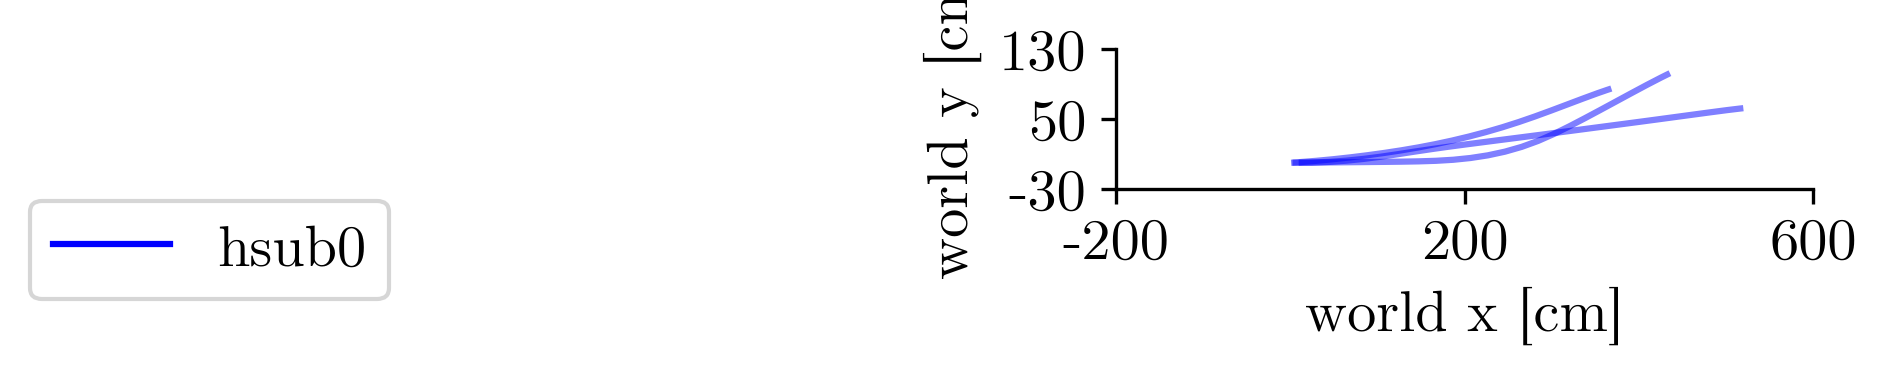

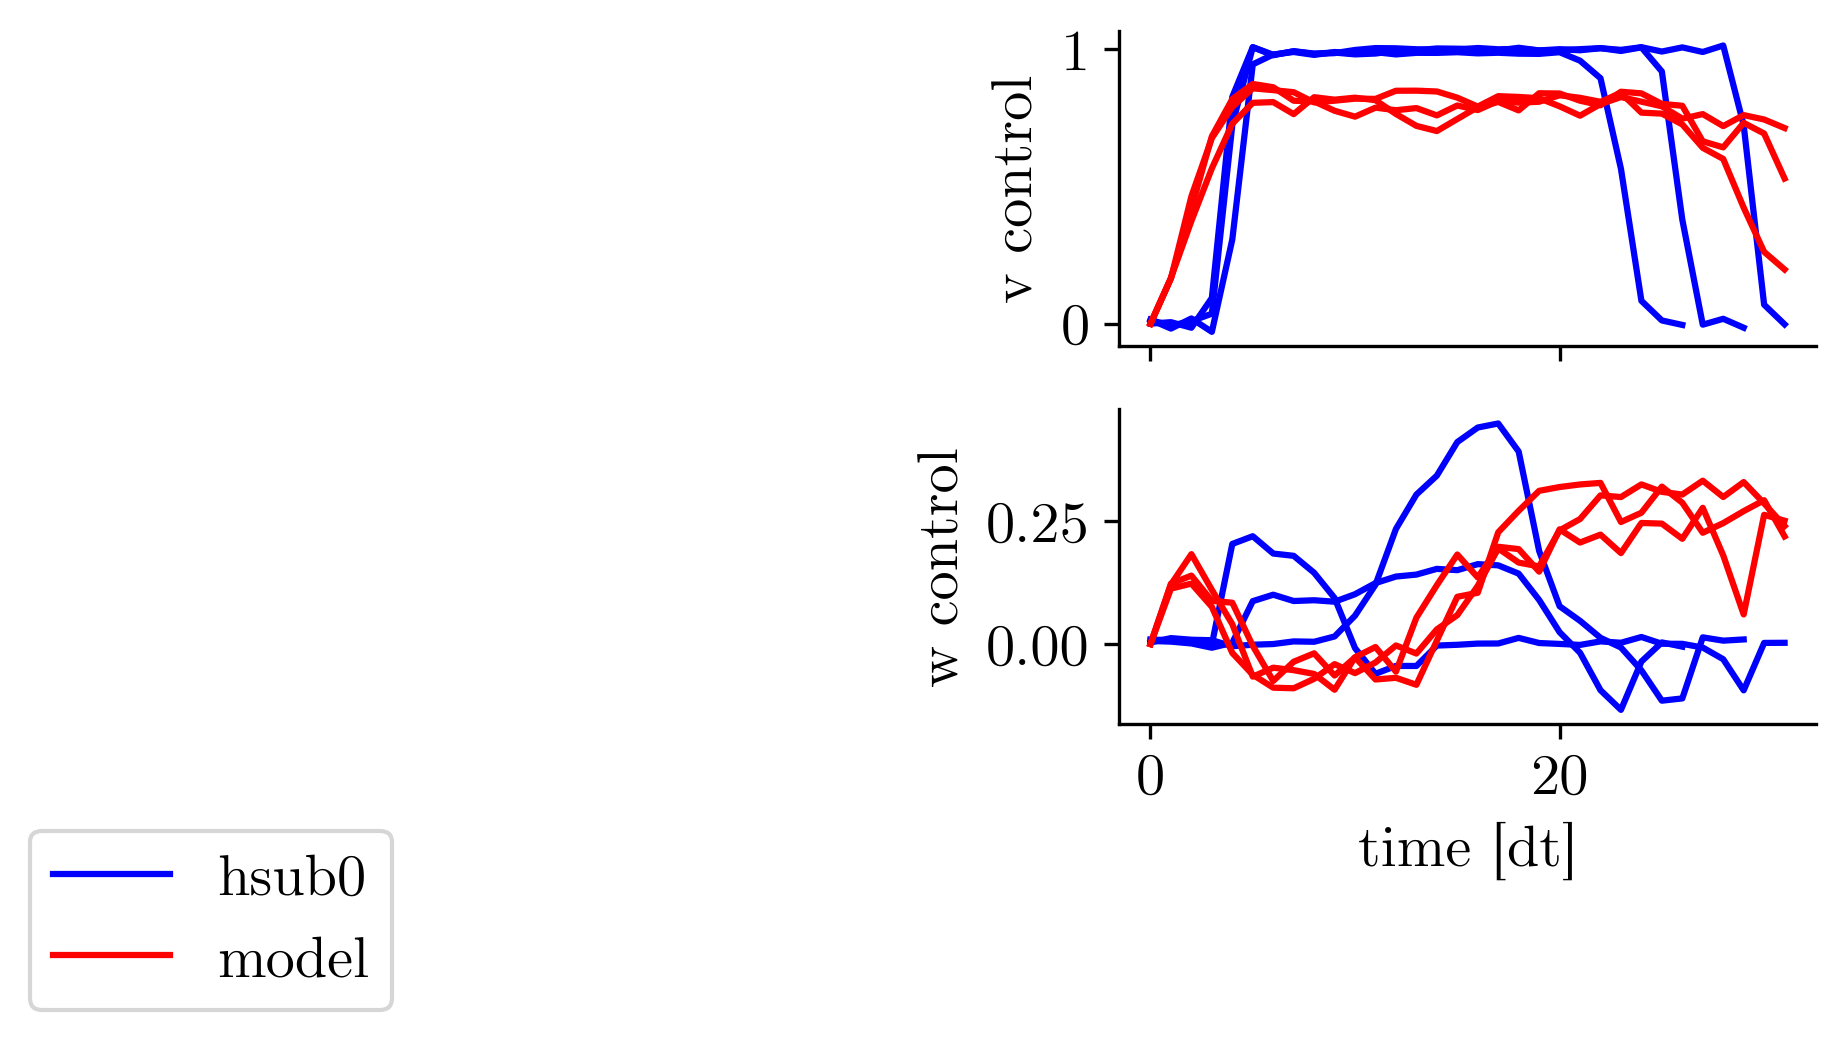

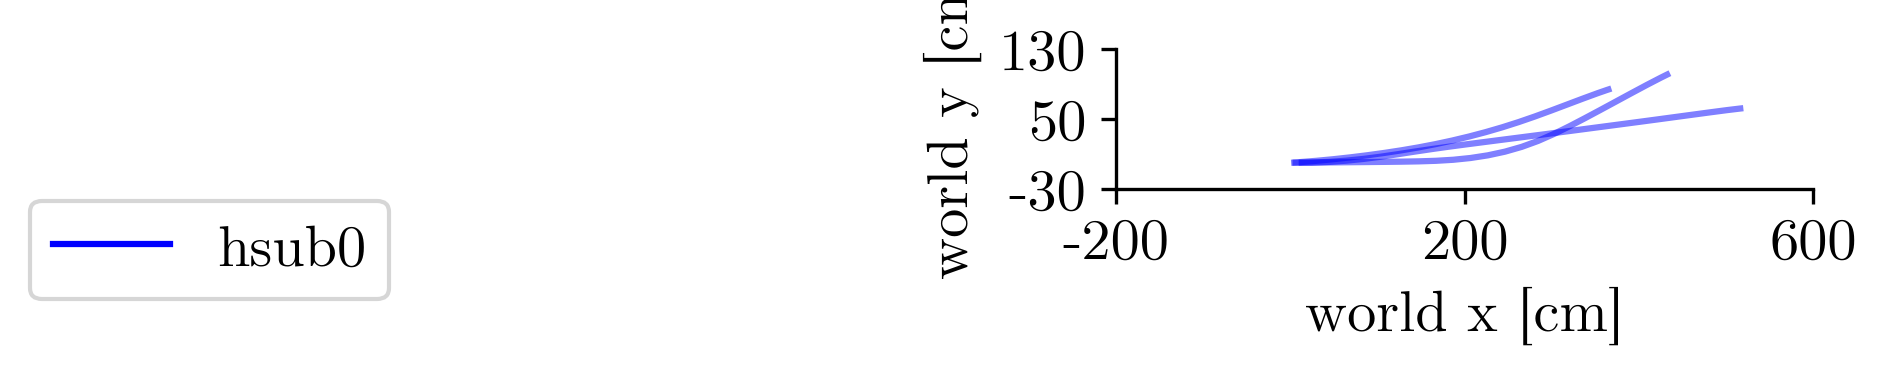

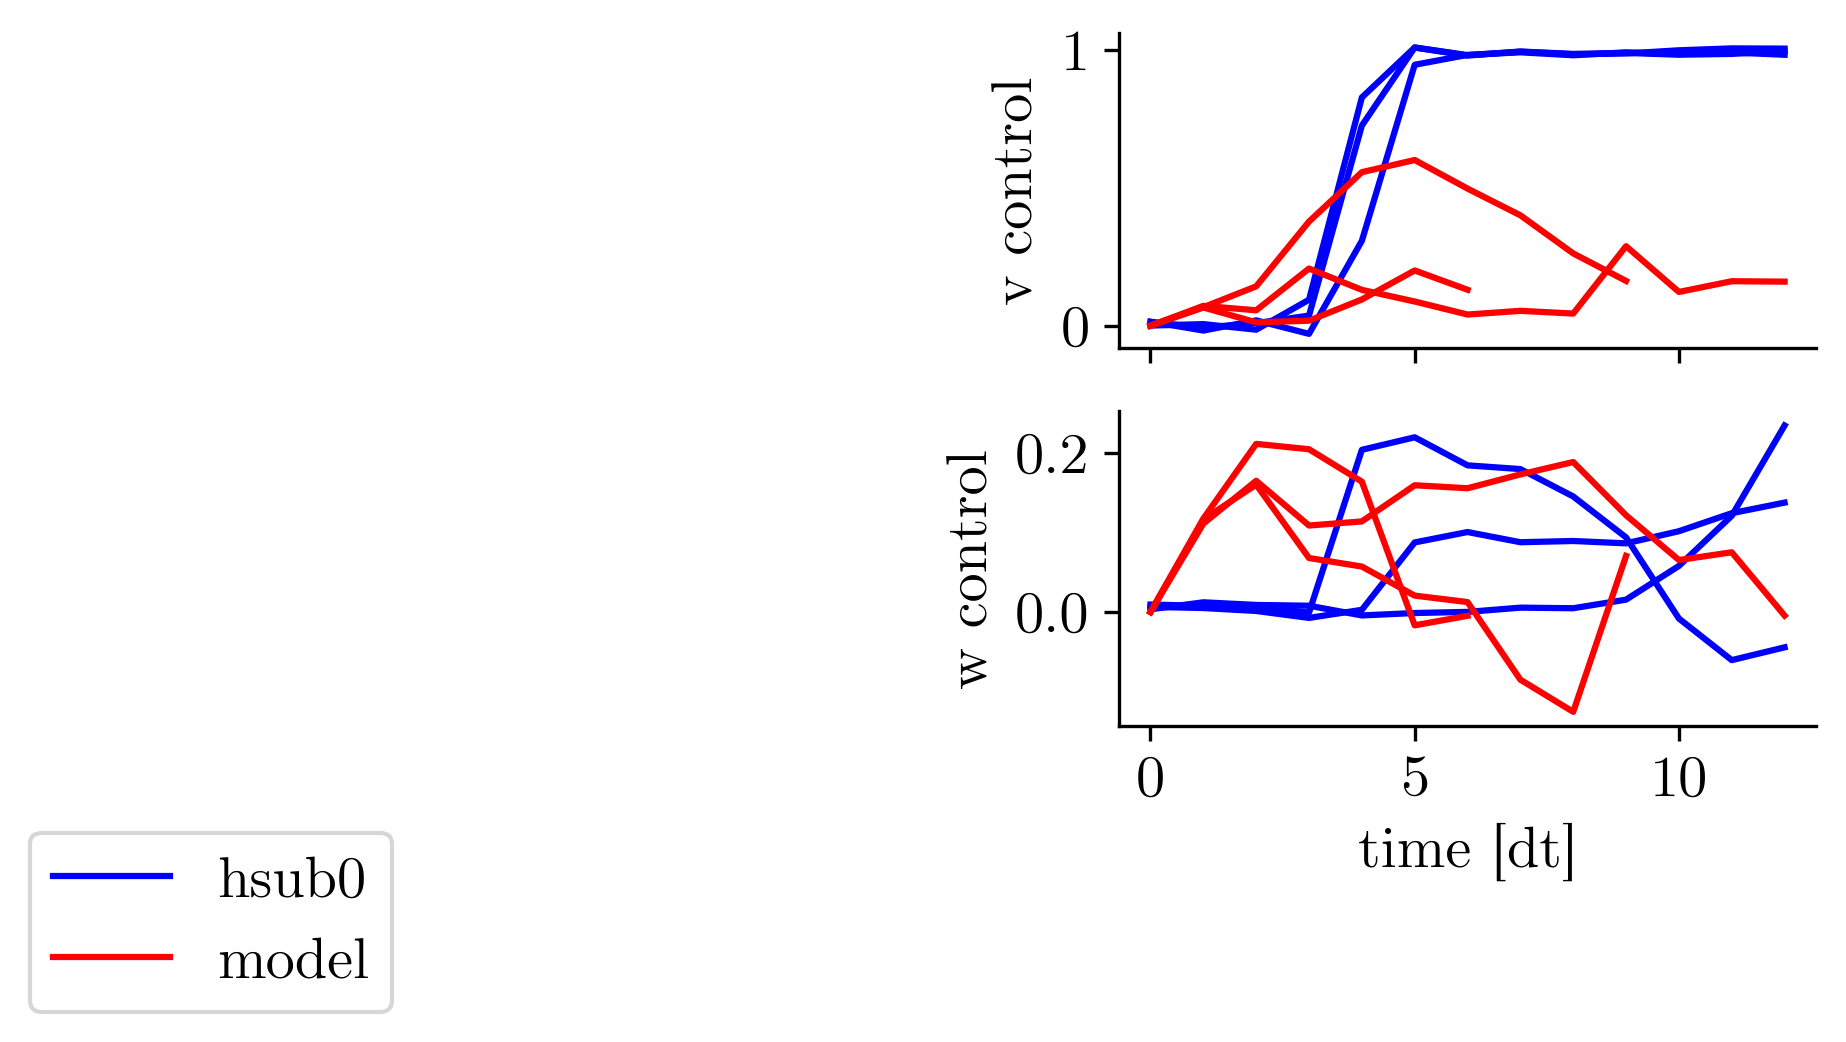

In [8]:

thesub='hsub0'
states, actions, tasks = asd_data_set['data'+thesub]

# select long trials (test set)
taskdist=np.array([np.linalg.norm(x) for x in tasks])
distsortind=np.argsort(taskdist)
testind=distsortind[int(len(distsortind)*3/4):]
states, actions, tasks = [states[t] for t in testind], [actions[t] for t in testind], tasks[testind]

ind=np.random.randint(low=0, high=len(tasks))
thetask=tasks[ind]
indls=similar_trials2this(tasks, thetask, ntrial=3)
print(ind)

substates=[states[i] for i in indls]
subactions=[actions[i] for i in indls]
subtasks=np.array(tasks)[indls]

# run trial with model (fully trained) ---------------------------
ax=plotoverhead_simple(substates,thetask,color='b',label=thesub,ax=None)
modelstates,modelactions=run_trials_multitask(agent, env, phi, asd_data_set['res'+thesub][0], subtasks, ntrials=1, action_noise=0.05)
T=max([len(s) for s in substates])
modelstates=[m[:T] for m in modelstates]

# plot overhead
ax=plotoverhead_simple(modelstates,thetask,color='r',label='model',ax=ax,plotgoal=True)
ax.get_figure()
# quicksave('{} model vs data overhead ind={}'.format(thesub, ind),fig=ax.get_figure())

# plot control curve 
fig=plotctrl_vs(subactions, modelactions, color1='b', color2='r', label1=thesub, label2='model', alpha=1)
# quicksave('{} model vs data control curve ind={}'.format(thesub, ind),fig=fig)


# run trial with model (part trained for test) ---------------------------
ax=plotoverhead_simple(substates,thetask,color='b',label=thesub,ax=None)
# run trial with model 
modelstates,modelactions=run_trials_multitask(agent, env, phi, asd_data_set['partres'+thesub][0], subtasks, ntrials=1)
T=max([len(s) for s in substates])
modelstates=[m[:T] for m in modelstates]

# plot overhead
ax=plotoverhead_simple(modelstates,thetask,color='r',label='model',ax=ax)
ax.get_figure()
# quicksave('{} model vs data overhead testset'.format(thesub),fig=ax.get_figure())

# plot control curve 
fig=plotctrl_vs(subactions, modelactions, color1='b', color2='r', label1=thesub, label2='model', alpha=1)
# quicksave('{} model vs data control curve testset'.format(thesub),fig=fig)





# cross validation

In [14]:

# compare validation logll and test logll -----------------------------------------------
# load data 
numhsub,numasub=25,14
fulltrainfolder='persub1cont'
parttrainfolder='persub3of5dp'
        
trainloglls=[]
testloglls=[]
subnames=[]
for invtag in ['h','a']:
    for isub in range(25):
        thesub="{}sub{}".format(invtag,str(isub))
        subnames.append(thesub)
        evalname=Path(datapath/"human/{}/evaltrain_inv{}sub{}".format(parttrainfolder,invtag,str(isub)))
        fullinverseres=Path(datapath/"human/{}".format(fulltrainfolder))/"inv{}sub{}".format(invtag,str(isub))
        partinverseres=Path(datapath/"human/{}".format(parttrainfolder))/"inv{}sub{}".format(invtag,str(isub))
        # load test logll
        if evalname.is_file():
            with open(evalname, 'rb') as f:
                a = pickle.load(f)
                testloglls.append([b[-1] for b in a[-2][2]] )
        # load train logll
        if fullinverseres.is_file():
            with open(fullinverseres, 'rb') as f:
                a = pickle.load(f)
                trainloglls.append([b[-1] for b in a[-2][2]] )


In [20]:
# stats
diffs=[]
for trainll, testll in zip(trainloglls,testloglls):
    diffs.append(np.array(trainll)- np.array(testll))
diffmu=np.mean(np.array(diffs))
npsummary(trainll)
npsummary(testll)
npsummary(diffs)
diffsem=(0.0263163953104295-1.5699516407368055)/(0.0263163953104295+1.5699516407368055)

print(f'training - testing mu {diffmu}, relative sem {diffsem}')

n samples  14
mean  10.952670506068639
std  0.09846693490653165
sem  0.0263163953104295
med  10.940749645233154
range  10.770963668823242 11.10084342956543
n samples  14
mean  25.07949447631836
std  5.874221153440737
sem  1.5699516407368055
med  23.666613578796387
range  18.137990951538086 43.18450164794922
n samples  21
mean  -1.192825537149598
std  3.3047351694940112
sem  0.7211523364756679
med  -0.5800634622573853
range  -32.08365821838379 2.1889190673828125
training - testing mu -1.192825537149598, relative sem -0.9670275984782661


In [23]:
# style 0. quick check
# for trainlogll, testlogll, thesub in zip(trainloglls,testloglls,subnames):
#     with initiate_plot(2,2,300) as fig:
#         ax=fig.add_subplot(111)
#         ax.hist(trainlogll, color='b', label='training data', bins=30, density=True)
#         ax.hist(testlogll,  color='r', label='testing data', bins=30, density=True)
#         quickspine(ax)
#         ax.set_xlabel('– log likelihood')
#         ax.set_ylabel('probability')
#         ax.set_title(thesub)
#         quickleg(ax)

        # quicksave('eval logll hist {}'.format(thesub))


In [ ]:

# # style 1, all together
# with initiate_plot(2,2,300) as fig:
#     ax=fig.add_subplot(111)
#     for trainlogll, testlogll, thesub in zip(trainloglls,testloglls,subnames):
#         ax.scatter(np.zeros_like(trainlogll),trainlogll, color='b', label='each subject log likelihood')
#         ax.scatter(np.ones_like(testlogll),testlogll, color='r', label='each subject log likelihood ')
#         lines=np.vstack([sorted(trainlogll),sorted(testlogll)])
#         ax.plot(lines, color='yellow', alpha=0.2)
#     quickspine(ax)
#     ax.set_ylabel('– log likelihood')
#     ax.set_xticks([0,1])
#     ax.set_xticklabels(['traning', 'testing'])
#     quickleg(ax)



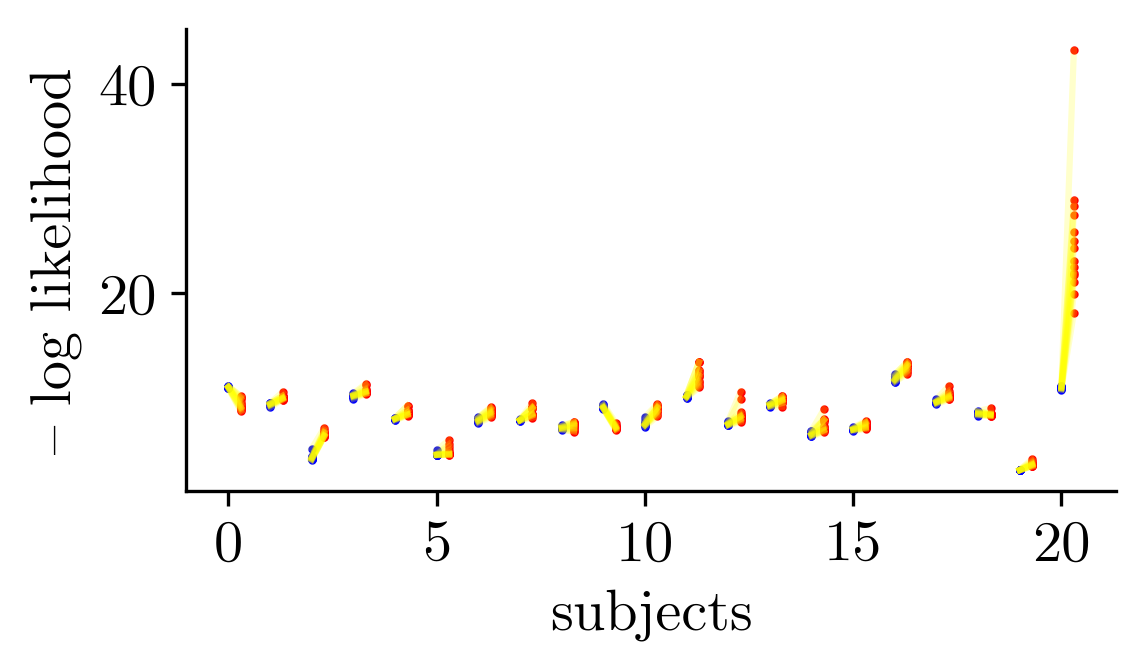

In [24]:

# style 2, sub by sub
with initiate_plot(4,2,300) as fig:
    i=0
    increment=0.3
    ax=fig.add_subplot(111)
    for trainlogll, testlogll, thesub in zip(trainloglls,testloglls,subnames):
        ax.scatter(np.zeros_like(trainlogll)+i,trainlogll, color='b', label='each subject training log likelihood',s=1)
        ax.scatter(np.zeros_like(testlogll)+i+increment,testlogll, color='r', label='each subject testing log likelihood ',s=1)
        
        lines=np.vstack([sorted(trainlogll),sorted(testlogll)]).T
        for y in lines:
            ax.plot([i, i+increment],y, color='yellow', alpha=0.2)
        i+=1
    quickspine(ax)
    ax.set_ylabel('– log likelihood')
    ax.set_xlabel('subjects')
    # ax.set_xticks([0,1])
    # ax.set_xticklabels(['traning', 'testing'])
    # quickleg(ax)
    # quicksave('each subjects logll train vs test')


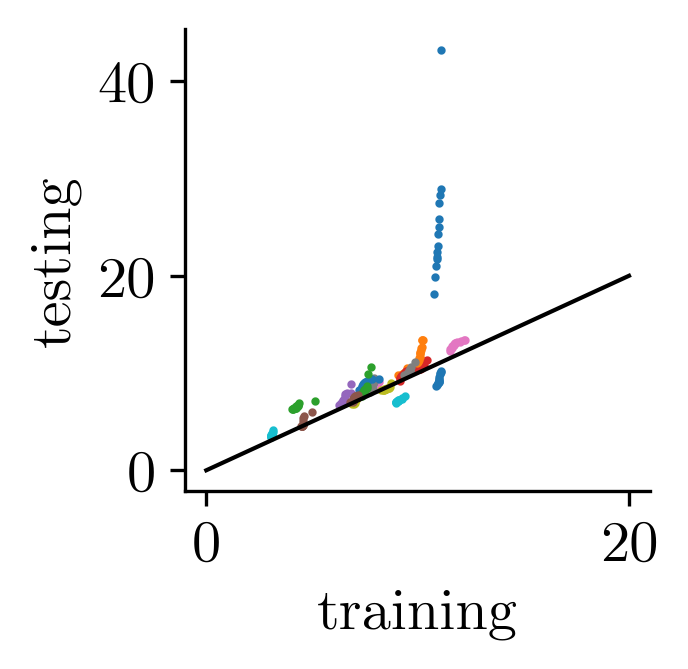

In [25]:

# style 3, train vs test together
with initiate_plot(2,2,300) as fig:
    ax=fig.add_subplot(111)
    for trainlogll, testlogll, thesub in zip(trainloglls,testloglls,subnames):
        ax.scatter(trainlogll,testlogll,s=1, alpha=1)
    ax.plot([0,20],[0,20], color='k', linewidth=1)
    quickspine(ax)
    ax.set_xlabel('training')
    ax.set_ylabel('testing')



In [27]:

# # style 4, train vs test per sub
# for trainlogll, testlogll, thesub in zip(trainloglls,testloglls,subnames):
#     with initiate_plot(2,2,300) as fig:
#         ax=fig.add_subplot(111)
#         # for trainlogll, testlogll, thesub in zip(trainloglls,testloglls,subnames):
#         ax.scatter(trainlogll,testlogll,s=1, alpha=1)
#         ax.plot([0,20],[0,20], color='k', linewidth=1)
#         quickspine(ax)
#         ax.set_xlabel('training')
#         ax.set_ylabel('testing')
#         ax.set_title(thesub)



In [12]:

# wellness of fit in r2 ---------------------
numhsub,numasub=25,14
fulltrainfolder='persub1cont'
parttrainfolder='persub3of5dp'
        
asd_data_set={}
numhsub,numasub=25,14
fulltrainfolder='persub1cont'
parttrainfolder='persub3of5dp'
for invtag in ['h','a']:
    for isub in range(numhsub):
        thesub="{}sub{}".format(invtag,str(isub))
        evalname=Path(datapath/"human/{}/evaltrain_inv{}sub{}".format(parttrainfolder,invtag,str(isub)))
        fullinverseres=Path(datapath/"human/{}".format(fulltrainfolder))/"inv{}sub{}".format(invtag,str(isub))
        partinverseres=Path(datapath/"human/{}".format(parttrainfolder))/"inv{}sub{}".format(invtag,str(isub))
        # load inv res
        if partinverseres.is_file():
            asd_data_set['partres'+thesub]=process_inv(partinverseres, usingbest=True, removegr=False)
        if fullinverseres.is_file():
            asd_data_set['res'+thesub]=process_inv(fullinverseres, usingbest=True, removegr=False)
        
        # load data
        if Path(datapath/'human/{}'.format(thesub)).is_file():
            with open(datapath/'human/{}'.format(thesub), 'rb') as f:
                states, actions, tasks = pickle.load(f)
            print(len(states))
            asd_data_set['data'+thesub]=states, actions, tasks
        


/Users/yc/Documents/lab_data/human/persub3of5dp/invhsub0
using ind:  57 final logll :  8.363489559718541
/Users/yc/Documents/lab_data/human/persub1cont/invhsub0
using ind:  85 final logll :  10.98047685623169
148
/Users/yc/Documents/lab_data/human/persub3of5dp/invhsub1
using ind:  53 final logll :  9.626935073307582
/Users/yc/Documents/lab_data/human/persub1cont/invhsub1
using ind:  47 final logll :  9.29283959524972
147
/Users/yc/Documents/lab_data/human/persub3of5dp/invhsub2
using ind:  57 final logll :  5.571606704166958
/Users/yc/Documents/lab_data/human/persub1cont/invhsub2
using ind:  83 final logll :  4.200698069163731
146
/Users/yc/Documents/lab_data/human/persub3of5dp/invhsub3
using ind:  51 final logll :  10.310851505824498
/Users/yc/Documents/lab_data/human/persub1cont/invhsub3
using ind:  48 final logll :  10.158493995666504
145
/Users/yc/Documents/lab_data/human/persub3of5dp/invhsub4
using ind:  58 final logll :  8.144282341003418
/Users/yc/Documents/lab_data/human/persub1

In [13]:
ntrial=50
for invtag in ['h','a']:
    for isub in range(numhsub):
        thesub="{}sub{}".format(invtag,str(isub))
        if 'partres'+thesub in asd_data_set:
            testtheta=asd_data_set['partres'+thesub][0]
        else: continue
        if 'res'+thesub in asd_data_set:
            traintheta=asd_data_set['res'+thesub][0]
        thestate, theaction, thetask=asd_data_set['data'+thesub]

        _,response_train_=run_trials_multitask(agent, env, phi, testtheta, thetask[:ntrial],ntrials=1, stimdur=None)
        _,response_test_=run_trials_multitask(agent, env, phi, traintheta, thetask[:ntrial],ntrials=1, stimdur=None)

        response_train=[]
        for a,b in zip(theaction[:ntrial], response_train_):
            padding=torch.zeros(100,2)
            response_train.append(torch.vstack([b,padding])[:len(a)])
        response_test=[]
        for a,b in zip(theaction[:ntrial], response_test_):
            padding=torch.zeros(100,2)
            response_test.append(torch.vstack([b,padding])[:len(a)])

        rsqr_train=r2(torch.vstack(theaction[:ntrial]), torch.vstack(response_train))
        rsqr_test=r2(torch.vstack(theaction[:ntrial]), torch.vstack(response_test))
        print('{} has training r2 of {}'.format(thesub, rsqr_train))
        print('{} has testing r2 of {}'.format(thesub, rsqr_test))
        print('difference is {}'.format(rsqr_train-rsqr_test))

        n=len(torch.vstack(response_train))
        mse_train=torch.sum((torch.vstack(theaction[:ntrial])- torch.vstack(response_train))**2)/n
        mse_test=torch.sum((torch.vstack(theaction[:ntrial])- torch.vstack(response_test))**2)/n
        print('{} has training mse of {}'.format(thesub, mse_train))
        print('{} has testing mse of {}'.format(thesub, mse_test))
        print('difference is {}'.format(mse_train-mse_test))



hsub0 has training r2 of 1.0
hsub0 has testing r2 of 1.0
difference is 0.0
hsub0 has training mse of 0.423710435628891
hsub0 has testing mse of 0.291428804397583
difference is 0.13228163123130798
hsub1 has training r2 of 1.0
hsub1 has testing r2 of 1.0
difference is 0.0
hsub1 has training mse of 0.17575080692768097
hsub1 has testing mse of 0.18682485818862915
difference is -0.011074051260948181


KeyboardInterrupt: 

/Users/yc/Documents/lab_data/human/fixragroup
using ind:  60 final logll :  10.684259755270821
/Users/yc/Documents/lab_data/human/clusterpaperhgroup
using ind:  60 final logll :  8.739409999999998


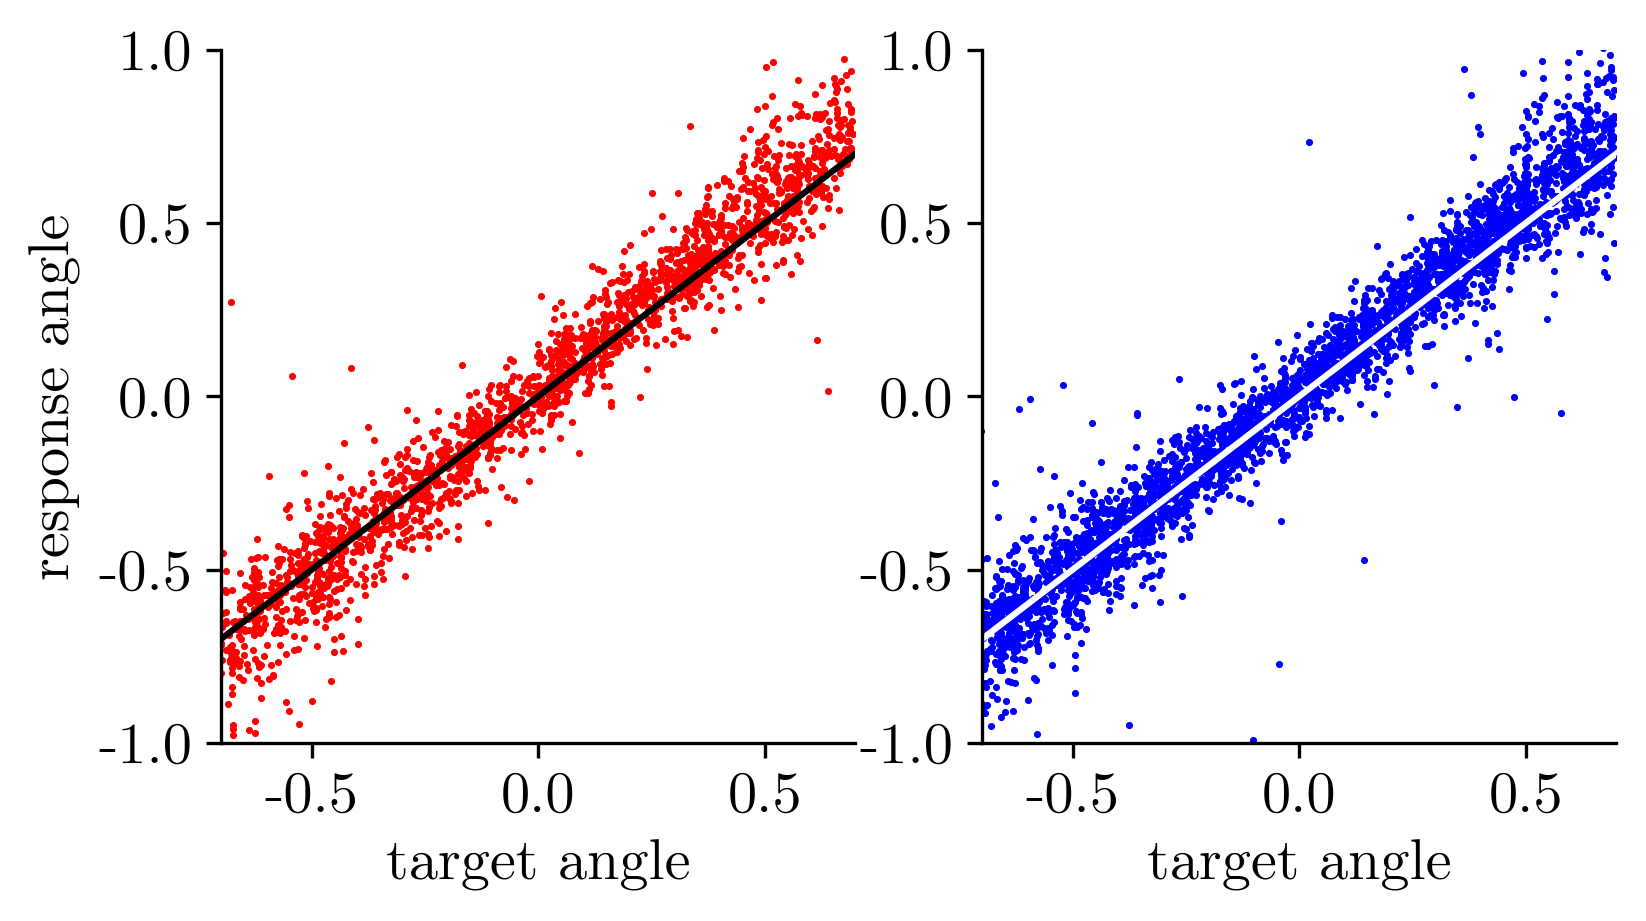

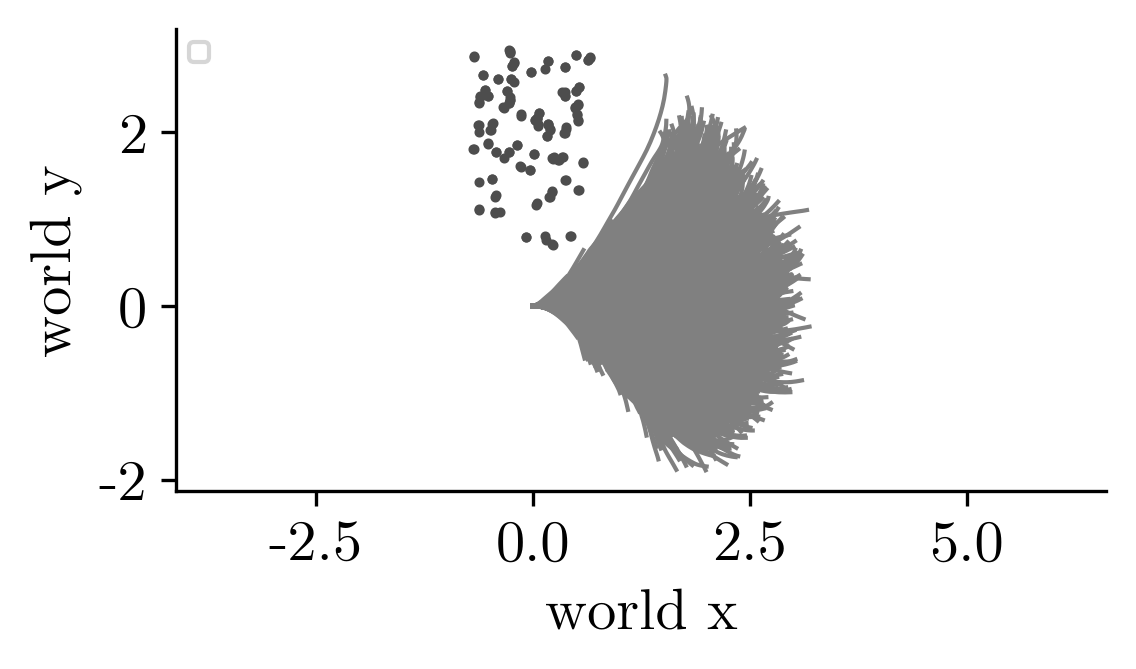

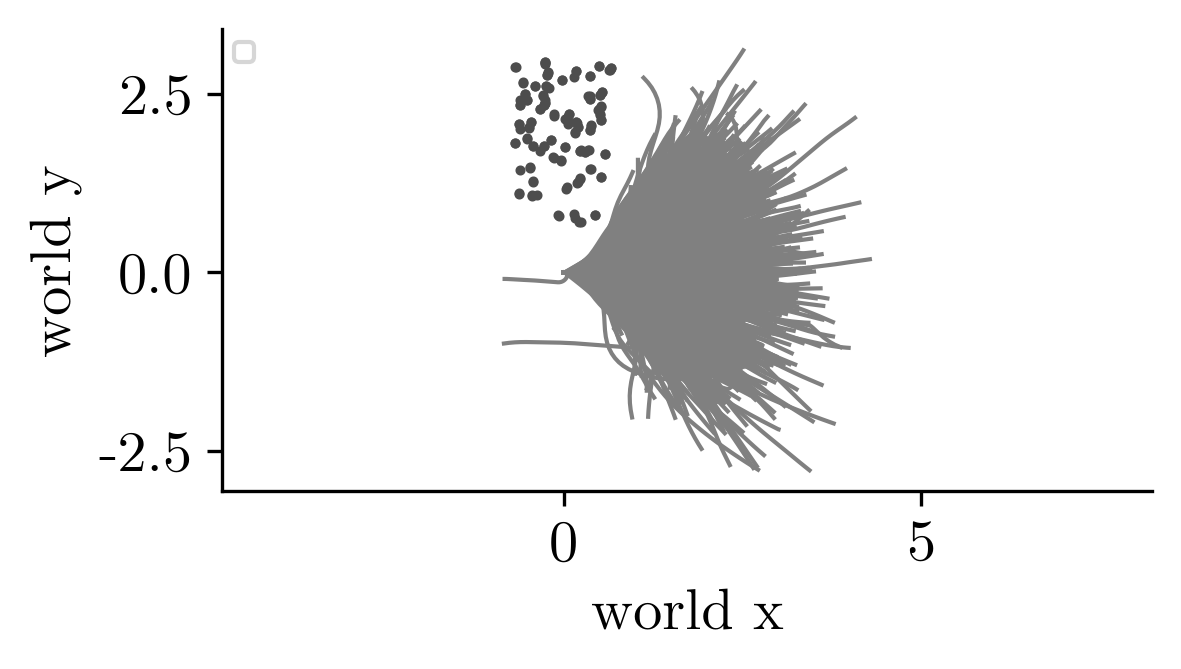

<Axes: xlabel='world x', ylabel='world y'>

In [51]:
# model performance vs actual data ---------------------------
env=ffacc_real.FireFlyPaper(arg)
env.episode_len=50
env.debug=1
env.terminal_vel=0.05
phi=torch.tensor([[1],
            [pi/2],
            [0.001],
            [0.001],
            [0.001],
            [0.001],
            [0.13],
            [0.001],
            [0.001],
            [0.001],
            [0.001],
    ])
agent_=TD3.load('trained_agent/paper.zip')
agent=agent_.actor.mu.cpu()

with open(datapath/"human/agroup", 'rb') as f:
    astate,_, tasks = pickle.load(f)

logls=[datapath/'human/fixragroup',datapath/'human/clusterpaperhgroup']
monkeynames=['ASD', 'Ctrl' ]

mus,covs,errs=[],[],[]
thetas=[]
for inv in logls:
    finaltheta,finalcov, err=process_inv(inv,ind=60,removegr=False)
    mus.append(np.array(finaltheta).reshape(-1))
    covs.append(finalcov)
    errs.append(err)
    thetas.append(finaltheta)
thetas=torch.tensor(mus)
theta_asd=thetas[0]
theta_nt=thetas[1]

response_asd,_=run_trials_multitask(agent, env, phi, theta_asd, tasks, ntrials=1, stimdur=None)
response_nt,_=run_trials_multitask(agent, env, phi, theta_nt, tasks,ntrials=1, stimdur=None)

asd_data_endpoint={}
asd_data_endpoint_polar={}
for invtag in ['h','a']:
    for isub in range(numhsub):
        thesub="{}sub{}".format(invtag,str(isub))
        if 'data'+thesub in asd_data_set:
            states,_,tasks=asd_data_set['data'+thesub]
            endpoint=np.array([s[-1,:2].tolist() for s in states])
            r,a=xy2pol(endpoint.T, rotation=False)
            endpointpolar=np.stack([a,r]).T
            r,a=xy2pol(tasks.T, rotation=False)
            taskspolar=np.stack([a,r]).T
            asd_data_endpoint[thesub]=(endpoint, tasks)
            asd_data_endpoint_polar[thesub]=(endpointpolar, taskspolar)

states=response_asd
endpoint=np.array([s[-1,:2].tolist() for s in states])
r,a=xy2pol(endpoint.T, rotation=False)
endpointpolar=np.stack([a,r]).T
r,a=xy2pol(tasks.T, rotation=False)
taskspolar=np.stack([a,r]).T
asd_model_endpoint=(endpoint, tasks)
asd_model_endpoint_polar=(endpointpolar, taskspolar)
states=response_nt
endpoint=np.array([s[-1,:2].tolist() for s in states])
r,a=xy2pol(endpoint.T, rotation=False)
endpointpolar=np.stack([a,r]).T
r,a=xy2pol(tasks.T, rotation=False)
taskspolar=np.stack([a,r]).T
nt_model_endpoint=(endpoint, tasks)
nt_model_endpoint_polar=(endpointpolar, taskspolar)


# angular err of data
with initiate_plot(6,3,300) as f:
    ax1=f.add_subplot(121)
    ax2=f.add_subplot(122, sharex=ax1, sharey=ax1)
    for thesub in asd_data_endpoint_polar.keys():
        if thesub[0]=='a': 
            color='r'
            (endpoint, tasks)=asd_data_endpoint_polar[thesub]
            ax1.scatter(tasks[:,0],endpoint[:,0],color=color, s=0.5)
        else: 
            color='b'
            (endpoint, tasks)=asd_data_endpoint_polar[thesub]
            ax2.scatter(tasks[:,0],endpoint[:,0],color=color, s=0.5)
    ax1.set_xlim(-0.7,0.7)
    ax1.set_ylim(-1,1)
    quickspine(ax1)
    quickspine(ax2)
    ax1.set_xlabel('target angle')
    ax2.set_xlabel('target angle')
    ax1.set_ylabel('response angle')
    ax1.plot([-0.7,.7],[-0.7,.7],'k')
    ax2.plot([-0.7,.7],[-0.7,.7],'w')
    # quicksave('asd angular err sep')

quickoverhead_state(response_asd,tasks)

quickoverhead_state(astate,tasks)




ValueError: x and y must be the same size

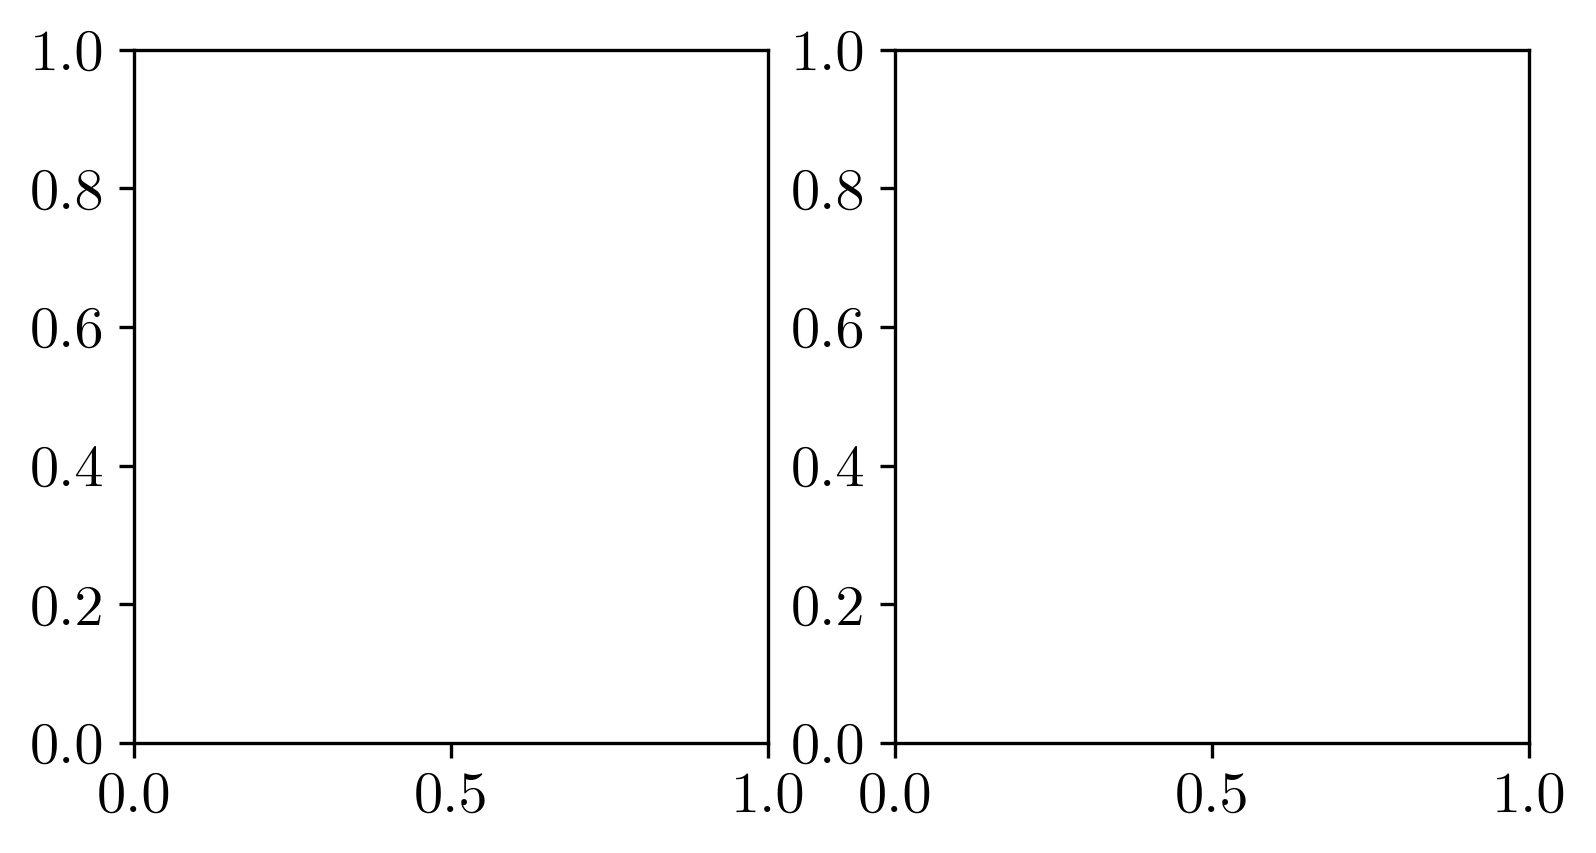

In [53]:

# for res_asd figures
import numpy as np
from plot_ult import * 
from scipy import stats 
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import numpy as np
from cmaes import CMA
import copy
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import pickle
import numpy as np
import torch
import heapq
from torch.distributions.multivariate_normal import MultivariateNormal
from matplotlib import pyplot as plt
import time
from stable_baselines3 import TD3
torch.manual_seed(0)
from numpy import linspace, pi
from InverseFuncs import *
from monkey_functions import *
from firefly_task import ffacc_real
from env_config import Config
# from cma_mpi_helper import run
import ray
from pathlib import Path
arg = Config()
import os
from timeit import default_timer as timer
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score


env=ffacc_real.FireFlyPaper(arg)
env.debug=True
env.terminal_vel=0.05
agent_=TD3.load('trained_agent/paper.zip')
agent=agent_.actor.mu.cpu()


# angular err of model compared to data
with initiate_plot(6,3,300) as f:
    ax1=f.add_subplot(121)
    ax2=f.add_subplot(122, sharex=ax1, sharey=ax1)
    color='r'
    (endpoint, _)=asd_model_endpoint_polar
    ax1.scatter(taskspolar[:,0],endpoint[:,0],color=color, s=0.5, label='ASD model')
    color='b'
    (endpoint, _)=nt_model_endpoint_polar
    ax2.scatter(taskspolar[:,0],endpoint[:,0],color=color, s=0.5, label='NT model')

    for thesub in asd_data_endpoint_polar.keys():
        if thesub[0]=='a': 
            color='pink'
            (endpoint, tasks)=asd_data_endpoint_polar[thesub]
            ax1.scatter(tasks[:,0],endpoint[:,0],color=color, s=0.5, alpha=0.5, label='ASD data')
        else: 
            color='tab:blue'
            (endpoint, tasks)=asd_data_endpoint_polar[thesub]
            ax2.scatter(tasks[:,0],endpoint[:,0],color=color, s=0.5, alpha=0.5, label='NT data')
    ax1.set_xlim(-0.7,0.7)
    ax1.set_ylim(-1,1)
    quickspine(ax1)
    quickspine(ax2)
    ax1.set_xlabel('target angle')
    ax2.set_xlabel('target angle')
    ax1.set_ylabel('response angle')
    ax1.plot([-0.7,.7],[-0.7,.7],'k')
    ax2.plot([-0.7,.7],[-0.7,.7],'w')
    quickleg(ax1); quickleg(ax2)
    # quicksave('model vs data asd angular err sep')

with initiate_plot(6,3,300) as f:
    ax1=f.add_subplot(121)
    ax2=f.add_subplot(122, sharex=ax1, sharey=ax1)
    color='r'
    (endpoint, _)=asd_model_endpoint_polar
    ax1.scatter(taskspolar[:,1],endpoint[:,1],color=color, s=0.5,alpha=0.5, label='ASD model')
    color='b'
    (endpoint, _)=nt_model_endpoint_polar
    ax2.scatter(taskspolar[:,1],endpoint[:,1],color=color, s=0.5,alpha=0.5, label='NT model')
    for thesub in asd_data_endpoint_polar.keys():
        if thesub[0]=='a': 
            color='pink'
            (endpoint, tasks)=asd_data_endpoint_polar[thesub]
            ax1.scatter(tasks[:,1],endpoint[:,1],color=color, s=0.5, alpha=0.5, label='ASD data')
        else: 
            color='tab:blue'
            (endpoint, tasks)=asd_data_endpoint_polar[thesub]
            ax2.scatter(tasks[:,1],endpoint[:,1],color=color, s=0.5, alpha=0.5, label='NT data')
    ax1.set_xlim(0.5,None)
    ax1.set_ylim(0,None)
    quickspine(ax1)
    quickspine(ax2)
    ax1.set_xlabel('target distance')
    ax2.set_xlabel('target distance')
    ax1.set_ylabel('response distance')
    ax1.plot([-0.7,3],[-0.7,3],'k')
    ax2.plot([-0.7,3],[-0.7,3],'w')
    quickleg(ax1); quickleg(ax2)
    # quicksave('model vs data asd radiual err sep')



import notification
notification.notify()



In [56]:
len(taskspolar), len(endpoint)

(146, 2019)